# PART- 2 `( Handling With Missing Vales )`

In [352]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [353]:
pd.options.mode.dtype_backend = 'pyarrow'
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format

In [354]:
df = pd.read_csv('clean.csv')

In [355]:
df.shape

(26594, 35)

In [356]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

In [357]:
df.shape

(26594, 35)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26594 entries, 0 to 26593
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               26594 non-null  object 
 1   make                     26594 non-null  object 
 2   model                    26330 non-null  object 
 3   price                    26594 non-null  float64
 4   body_type                26594 non-null  object 
 5   type                     26594 non-null  object 
 6   doors                    26253 non-null  float64
 7   warranty                 26594 non-null  object 
 8   mileage                  26593 non-null  float64
 9   gearbox                  26360 non-null  object 
 10  seller                   26594 non-null  object 
 11  seats                    23633 non-null  float64
 12  engine_size              25251 non-null  float64
 13  gears                    17571 non-null  float64
 14  co2_emissions         

In [359]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

mixed_type_columns = [(x,', '.join(list(df[x].apply(type).unique().astype(str)))) for x in df if df[x].apply(type).nunique() > 1]
one_type_columns = [(x,list(df[x].apply(type).unique())) for x in df if df[x].apply(type).nunique() == 1]

def check_column_types(data):
    for x in data:
        if data[x].apply(type).nunique() > 1:
            print("Column" + " " + color.BOLD + color.RED + str(x) + color.END + " " + "has mixed object types." )
        #elif data[x].apply(type).nunique() == 1:
            #print("Column" + " " + color.BOLD + color.GREEN + str(x) + color.END + " " + "has one object type." )
        #else:
            #print('Error')
check_column_types(df)

Column model has mixed object types.
Column gearbox has mixed object types.
Column drivetrain has mixed object types.
Column comfort_convenience has mixed object types.
Column entertainment_media has mixed object types.
Column safety_security has mixed object types.
Column extras has mixed object types.
Column upholstery has mixed object types.
Column fuel has mixed object types.


In [360]:
df.sample(3)

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
4682,Opel Vectra,Opel,Vectra,2990.00,Sedan,Used,5.00,No,208580.00,Manual,Dealer,5.00,1598.00,5.00,NaN,Front,4.00,"Air conditioning, Electrical side mirrors, Pow...",NaN,"ABS, Central door lock, Driver-side airbag, Im...",Alloy wheels,1325.00,No,NaN,-,-,101.00,74.00,20.00,7.30,Benzine,Spain,"Calle Bizkarmendia, 31600 Burlada, Navarra, Spain",42.83,-1.62
17698,Toyota Auris,Toyota,Auris,19900.00,Station wagon,Used,5.00,Yes,74845.00,Automatic,Dealer,5.00,1798.00,1.00,NaN,Front,4.00,"Air conditioning, Automatic climate control, C...","Bluetooth, CD player, MP3, On-board computer, USB","ABS, Central door lock, Driver-side airbag, Fo...",Alloy wheels,1310.00,No,NaN,-,-,136.00,100.00,4.00,4.50,Electric,Spain,"Calle Primero de Mayo 48, 46930 Cuart de Poble...",39.48,-0.45
1576,Mercedes-Benz GLA 200,Mercedes-Benz,GLA 200,21500.00,Off-Road/Pick-up,Used,5.00,No,121000.00,Automatic,Dealer,5.00,1595.00,NaN,140.00,NaN,NaN,"Air conditioning, Cruise control, Electrical s...",NaN,"ABS, Central door lock, Electronic stability c...",Alloy wheels,NaN,No,NaN,1,C,156.00,115.00,6.00,5.90,Benzine,Germany,"Hörder-Bach Allee 2, 44263 Dortmund, Germany",51.49,7.51


<Figure size 720x360 with 0 Axes>

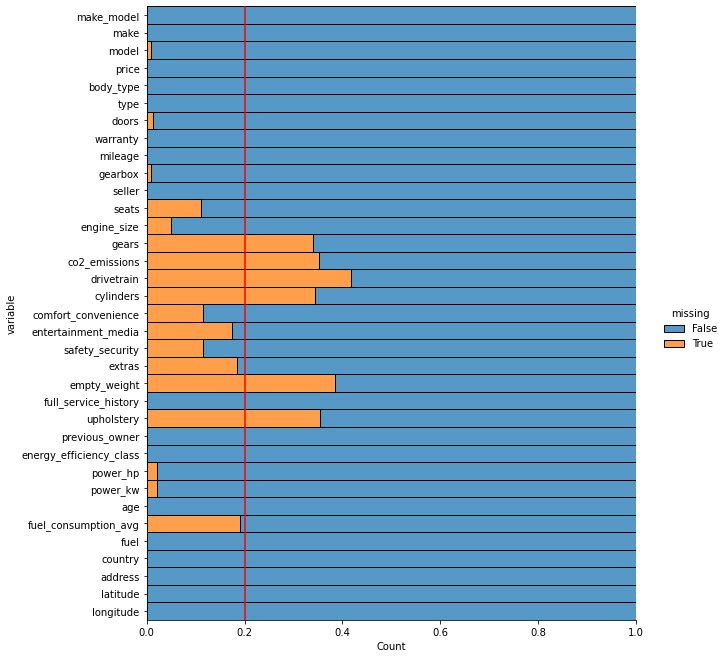

In [361]:
show_nulls(df)

In [362]:
def show_cols_nan():
    missing_values_percentage = (df.isna().sum() / df.shape[0] * 100).to_frame()
    return missing_values_percentage[missing_values_percentage[0] > 0].sort_values(by=0, ascending=True)
show_cols_nan()

,0
mileage,0.00
age,0.01
longitude,0.04
fuel,0.04
latitude,0.04
gearbox,0.88
model,0.99
doors,1.28
power_hp,2.11
power_kw,2.16


In [363]:
# COLUMNS THAT DO NOT HAVE NANS
def full_columns():
    return df.isna().sum()[df.isna().sum() == 0].index.to_list()
full_columns()

['make_model',
 'make',
 'price',
 'body_type',
 'type',
 'warranty',
 'seller',
 'full_service_history',
 'previous_owner',
 'energy_efficiency_class',
 'country',
 'address']

In [364]:
def i(col):
    print(df[col].isna().value_counts())

In [365]:
def first_looking(col):
    print("COLUMN NAME    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [366]:
# ['make_model', 'body_type','age','hp']
def fill_with_mean(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        print(groups[:x])
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(x.mean()))
        print(df_copy[col].isna().value_counts()) 
        print('--' * 20)
    return df_copy

In [367]:
# ['make_model', 'body_type','age','fuel']
def fill_with_mode(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        print(groups[:x])
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
        print(df_copy[col].isna().value_counts())
        print('--' * 20)
    return df_copy

In [368]:
# ['make_model', 'body_type','age','hp']
def fill_with_median(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        print(groups[:x])
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(x.median()))
        print(df_copy[col].isna().value_counts()) 
        print('--' * 20)
    return df_copy

In [369]:
def fill_with_ffill(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        print(groups[:x])
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(method = 'ffill').fillna(method="bfill"))
        print(df_copy[col].isna().value_counts()) 
        print('--' * 20)
    # df_copy[col] = df_copy[col].fillna(method = 'ffill').fillna(method="bfill")
    return df_copy

## age

In [370]:
first_looking('age')

COLUMN NAME    :  age
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  83
--------------------------------
age
3.00       3425
4.00       3218
0.00       2834
1.00       2708
2.00       2349
           ... 
72.00         1
76.00         1
66.00         1
-180.00       1
69.00         1
Name: count, Length: 84, dtype: int64


In [371]:
rows_to_drop = df[df.age < 0].index
rows_to_drop

Index([6944, 9685, 18894], dtype='int64')

In [372]:
df.shape

(26594, 35)

In [373]:
df.drop(rows_to_drop, inplace= True)

In [374]:
df.shape

(26591, 35)

In [375]:
df[df.age.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
677,Mercedes-Benz E 53 AMG,Mercedes-Benz,E 53 AMG,108900.00,Convertible,Demonstration,2.00,Yes,3856.00,Automatic,Dealer,4.00,2999.00,8.00,219.00,4WD,NaN,"360° camera, Air conditioning, Automatic clima...","Android Auto, Apple CarPlay, Bluetooth, CD pla...","Alarm system, Central door lock, Driver-side a...","Alloy wheels, Ambient lighting, Automatically ...",NaN,No,Full leather,-,-,435.00,320.00,NaN,NaN,Benzine,Belgium,"Avenue de l'Industrie 24, 4500 Huy",50.53,5.26
16598,Toyota Corolla,Toyota,Corolla,33999.00,Compact,Demonstration,5.00,No,2494.00,Automatic,Dealer,NaN,1987.00,NaN,89.00,NaN,4.00,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Daytime running lights, Distance warning ...","Alloy wheels, Automatically dimming interior m...",1315.00,Yes,Cloth,-,-,184.00,135.00,NaN,NaN,Benzine,Netherlands,"Steenbokstraat 3, 7324 AZ Apeldoorn, Netherlands",52.24,5.98


In [376]:
df.loc[df.age.isna() & (df.mileage < 10000),['age']] = 0

In [377]:
df[df.age.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude


In [378]:
def remove_duplicates():
    print(df.shape)
    df_copy = df.copy()
    df_copy.drop_duplicates(inplace = True)
    df_copy.reset_index(drop=True, inplace=True)
    print(df_copy.shape)
    return df_copy

## mileage

In [379]:
df.mileage

0       120200.00
1         5000.00
2        18900.00
3        18995.00
4       197000.00
           ...   
26589    40345.00
26590   145000.00
26591    96000.00
26592    94343.00
26593   230047.00
Name: mileage, Length: 26591, dtype: float64

In [380]:
df.mileage.iloc[0]

120200.0

In [381]:
first_looking('mileage')

COLUMN NAME    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14180
--------------------------------
mileage
10.00        518
1.00         159
5000.00      118
100.00       111
5.00         105
            ... 
30705.00       1
41484.00       1
40687.00       1
92117.00       1
230047.00      1
Name: count, Length: 14181, dtype: int64


In [382]:
df[df.mileage.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
10654,Fiat 500X,Fiat,500X,41570.00,Off-Road/Pick-up,Demonstration,5.00,No,NaN,Automatic,Dealer,5.00,1469.00,7.00,NaN,NaN,4.00,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels, Electronic parking brake, Emerge...",1380.00,No,Full leather,-,-,131.00,96.00,0.00,NaN,Electric,Netherlands,"Cruquiusweg 35, 2102 LS Heemstede, Netherlands",52.34,4.63


In [383]:
df = fill_with_mean('mileage',groups=['make','make_model','body_type','age'])

mileage
False    26590
True         1
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'age']
mileage
False    26591
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
mileage
False    26591
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
mileage
False    26591
Name: count, dtype: int64
----------------------------------------
['make']
mileage
False    26591
Name: count, dtype: int64
----------------------------------------


In [384]:
# CONTROL
# df[(df.make == 'Fiat') & (df.make_model == 'Fiat 500X') & (df.body_type == 'Off-Road/Pick-up') & (df.age == 0)]

In [385]:
df.mileage.shape

(26591,)

In [386]:
remove_duplicates()

(26591, 35)
(26591, 35)


,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,16950.00,Compact,Used,5.00,Yes,120200.00,Manual,Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,-,-,NaN,NaN,6.00,NaN,Diesel,Spain,"Calle Forja 6, 11500 El Puerto de Santa María,...",36.62,-6.21
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,80900.00,Compact,Pre-registered,4.00,Yes,5000.00,Automatic,Dealer,5.00,1.00,9.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,-,-,292.00,215.00,0.00,NaN,Electric,Spain,"Calle Logroño, 28649 Rozas de Puerto Real, Mad...",40.32,-4.47
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,69900.00,Compact,Used,5.00,Yes,18900.00,Automatic,Dealer,5.00,1991.00,8.00,NaN,4WD,4.00,NaN,NaN,NaN,NaN,NaN,No,NaN,-,-,421.00,310.00,2.00,8.40,Benzine,Spain,"Muelle de Llevant, 43004 Tarragona, Spain",41.11,1.25
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,46990.00,Compact,Used,5.00,Yes,18995.00,Automatic,Dealer,5.00,1991.00,7.00,NaN,4WD,4.00,"Air conditioning, Automatic climate control, P...",USB,"ABS, Central door lock, Driver-side airbag, El...",Sport seats,NaN,No,NaN,-,-,306.00,225.00,2.00,7.30,Benzine,Spain,"Calle Provenza, Valle de los Molinos, 45200 Gu...",20.85,-103.43
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,16800.00,Compact,Used,5.00,Yes,197000.00,Automatic,Dealer,5.00,2143.00,7.00,NaN,4WD,4.00,"Air conditioning, Electrical side mirrors, Mul...","Bluetooth, CD player, MP3, USB","ABS, Central door lock, Driver-side airbag, El...",NaN,1545.00,No,NaN,-,-,136.00,100.00,7.00,4.90,Diesel,Spain,"Carril de los Aragonés 4, 30007 Murcia, Spain",38.01,-1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26586,Volvo S90,Volvo,S90,37600.00,Sedan,Used,4.00,Yes,40345.00,Automatic,Dealer,4.00,1969.00,8.00,NaN,4WD,4.00,"Air conditioning, Automatic climate control, M...","Bluetooth, USB","ABS, Central door lock, Driver-side airbag, El...",Alloy wheels,2077.00,No,NaN,-,-,392.00,288.00,3.00,2.00,Electric,Spain,"Calle de los Hermanos Lumière 16, 29004 Málaga...",36.69,-4.46
26587,Volvo S40,Volvo,S40,5499.00,Sedan,Used,4.00,No,145000.00,Automatic,Dealer,5.00,2435.00,5.00,217.00,Front,5.00,"Air conditioning, Armrest, Automatic climate c...","On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (16""), Trailer hitch",1357.00,Yes,NaN,-,-,170.00,125.00,18.00,9.10,Benzine,Netherlands,"Stobbeweg 6, 2461 EX Ter Aar, Netherlands",52.18,4.71
26588,Volvo C30,Volvo,C30,7300.00,Sedan,Used,3.00,Yes,96000.00,Manual,Dealer,4.00,1560.00,6.00,99.00,Front,4.00,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Hands-free equipment, MP...","ABS, Alarm system, Central door lock with remo...","Alloy wheels, Automatically dimming interior m...",1356.00,Yes,NaN,1,-,114.00,84.00,11.00,3.80,Diesel,Belgium,"5060, Belgium",50.45,4.64
26589,Volvo S90,Volvo,S90,29900.00,Sedan,Used,4.00,Yes,94343.00,Automatic,Dealer,5.00,1969.00,8.00,149.00,NaN,4.00,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Hands-...","Adaptive Cruise Control, Adaptive headlights, ...","Alloy wheels (18""), Automatically dimming inte...",1617.00,Yes,Full leather,-,-,254.00,187.00,5.00,6.50,Benzine,Netherlands,"Bergambachterstraat 5, 2871 JB Schoonhoven, Ne...",51.96,4.85


## fuel

In [387]:
df.fuel

0          Diesel
1        Electric
2         Benzine
3         Benzine
4          Diesel
           ...   
26589    Electric
26590     Benzine
26591      Diesel
26592     Benzine
26593     Benzine
Name: fuel, Length: 26591, dtype: object

In [388]:
# ['make','make_model','body_type','country','age']
df = fill_with_mode('fuel',groups=['make','make_model','body_type','country','age'])

fuel
False    26581
True        10
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'age']
fuel
False    26589
True         2
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
fuel
False    26591
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
fuel
False    26591
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
fuel
False    26591
Name: count, dtype: int64
----------------------------------------
['make']
fuel
False    26591
Name: count, dtype: int64
----------------------------------------


In [389]:
remove_duplicates()

(26591, 35)
(26591, 35)


,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,16950.00,Compact,Used,5.00,Yes,120200.00,Manual,Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,-,-,NaN,NaN,6.00,NaN,Diesel,Spain,"Calle Forja 6, 11500 El Puerto de Santa María,...",36.62,-6.21
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,80900.00,Compact,Pre-registered,4.00,Yes,5000.00,Automatic,Dealer,5.00,1.00,9.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,-,-,292.00,215.00,0.00,NaN,Electric,Spain,"Calle Logroño, 28649 Rozas de Puerto Real, Mad...",40.32,-4.47
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,69900.00,Compact,Used,5.00,Yes,18900.00,Automatic,Dealer,5.00,1991.00,8.00,NaN,4WD,4.00,NaN,NaN,NaN,NaN,NaN,No,NaN,-,-,421.00,310.00,2.00,8.40,Benzine,Spain,"Muelle de Llevant, 43004 Tarragona, Spain",41.11,1.25
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,46990.00,Compact,Used,5.00,Yes,18995.00,Automatic,Dealer,5.00,1991.00,7.00,NaN,4WD,4.00,"Air conditioning, Automatic climate control, P...",USB,"ABS, Central door lock, Driver-side airbag, El...",Sport seats,NaN,No,NaN,-,-,306.00,225.00,2.00,7.30,Benzine,Spain,"Calle Provenza, Valle de los Molinos, 45200 Gu...",20.85,-103.43
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,16800.00,Compact,Used,5.00,Yes,197000.00,Automatic,Dealer,5.00,2143.00,7.00,NaN,4WD,4.00,"Air conditioning, Electrical side mirrors, Mul...","Bluetooth, CD player, MP3, USB","ABS, Central door lock, Driver-side airbag, El...",NaN,1545.00,No,NaN,-,-,136.00,100.00,7.00,4.90,Diesel,Spain,"Carril de los Aragonés 4, 30007 Murcia, Spain",38.01,-1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26586,Volvo S90,Volvo,S90,37600.00,Sedan,Used,4.00,Yes,40345.00,Automatic,Dealer,4.00,1969.00,8.00,NaN,4WD,4.00,"Air conditioning, Automatic climate control, M...","Bluetooth, USB","ABS, Central door lock, Driver-side airbag, El...",Alloy wheels,2077.00,No,NaN,-,-,392.00,288.00,3.00,2.00,Electric,Spain,"Calle de los Hermanos Lumière 16, 29004 Málaga...",36.69,-4.46
26587,Volvo S40,Volvo,S40,5499.00,Sedan,Used,4.00,No,145000.00,Automatic,Dealer,5.00,2435.00,5.00,217.00,Front,5.00,"Air conditioning, Armrest, Automatic climate c...","On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (16""), Trailer hitch",1357.00,Yes,NaN,-,-,170.00,125.00,18.00,9.10,Benzine,Netherlands,"Stobbeweg 6, 2461 EX Ter Aar, Netherlands",52.18,4.71
26588,Volvo C30,Volvo,C30,7300.00,Sedan,Used,3.00,Yes,96000.00,Manual,Dealer,4.00,1560.00,6.00,99.00,Front,4.00,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Hands-free equipment, MP...","ABS, Alarm system, Central door lock with remo...","Alloy wheels, Automatically dimming interior m...",1356.00,Yes,NaN,1,-,114.00,84.00,11.00,3.80,Diesel,Belgium,"5060, Belgium",50.45,4.64
26589,Volvo S90,Volvo,S90,29900.00,Sedan,Used,4.00,Yes,94343.00,Automatic,Dealer,5.00,1969.00,8.00,149.00,NaN,4.00,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Hands-...","Adaptive Cruise Control, Adaptive headlights, ...","Alloy wheels (18""), Automatically dimming inte...",1617.00,Yes,Full leather,-,-,254.00,187.00,5.00,6.50,Benzine,Netherlands,"Bergambachterstraat 5, 2871 JB Schoonhoven, Ne...",51.96,4.85


## gearbox

In [390]:
first_looking('gearbox')

COLUMN NAME    :  gearbox
--------------------------------
per_of_nulls   :  % 0.88
num_of_nulls   :  234
num_of_uniques :  3
--------------------------------
gearbox
Manual            16124
Automatic         10169
NaN                 234
Semi-automatic       64
Name: count, dtype: int64


In [391]:
df = fill_with_mode('gearbox',groups=['make','make_model','body_type', 'fuel','age','country'])

gearbox
False    26357
True       234
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'age', 'country']
gearbox
False    26454
True       137
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'age']
gearbox
False    26529
True        62
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel']
gearbox
False    26576
True        15
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
gearbox
False    26583
True         8
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
gearbox
False    26591
Name: count, dtype: int64
----------------------------------------
['make']
gearbox
False    26591
Name: count, dtype: int64
----------------------------------------


In [392]:
df.shape

(26591, 35)

## Model

** If the model is na it is considered that the data is wrong.

In [393]:
df[df.model.isna()].shape

(264, 35)

In [394]:
df.drop(df[df.model.isna()].index, inplace = True)

In [395]:
df = remove_duplicates()

(26327, 35)
(26327, 35)


# doors

In [396]:
first_looking('doors')

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 1.26
num_of_nulls   :  331
num_of_uniques :  6
--------------------------------
doors
5.00    16151
2.00     4886
4.00     2801
3.00     2151
NaN       331
6.00        5
1.00        2
Name: count, dtype: int64


In [397]:
df.shape

(26327, 35)

In [398]:
df_doors = fill_with_mode('doors',groups = ['make','make_model','body_type','fuel','country'])

doors
False    25996
True       331
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'country']
doors
False    26227
True       100
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel']
doors
False    26286
True        41
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
doors
False    26296
True        31
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
doors
False    26318
True         9
Name: count, dtype: int64
----------------------------------------
['make']
doors
False    26327
Name: count, dtype: int64
----------------------------------------


In [399]:
df_doors[df.doors.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
514,Mercedes-Benz SL 560,Mercedes-Benz,SL 560,44500.00,Convertible,Used,5.00,No,105000.00,Automatic,Dealer,NaN,5600.00,NaN,NaN,Rear,8.00,"Air conditioning, Armrest, Automatic climate c...","CD player, Radio","ABS, Alarm system, Central door lock, Driver-s...",Spare tyre,NaN,Yes,Full leather,-,-,238.00,175.00,34.00,NaN,Benzine,Belgium,"Brugsestraat 183, 8210 Zedelgem",51.13,3.14
598,Mercedes-Benz 190,Mercedes-Benz,190,180000.00,Convertible,Used,2.00,No,10.00,Manual,Dealer,2.00,NaN,4.00,0.00,Rear,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,4,-,105.00,77.00,59.00,NaN,Benzine,Germany,"Wilsumer Str 8, 49847 Itterbeck, Germany",52.51,6.81
719,Mercedes-Benz 500,Mercedes-Benz,500,45000.00,Convertible,Used,2.00,No,69900.00,Automatic,Dealer,NaN,NaN,NaN,NaN,NaN,NaN,Air conditioning,NaN,NaN,NaN,NaN,No,Full leather,-,-,NaN,NaN,39.00,NaN,Benzine,Germany,"Freisinger Str 4, 86551 Aichach, Germany",48.46,11.13
722,Mercedes-Benz SL 450,Mercedes-Benz,SL 450,14995.00,Convertible,Used,5.00,No,63715.00,Automatic,Dealer,2.00,NaN,NaN,NaN,Rear,NaN,NaN,NaN,NaN,NaN,NaN,No,Full leather,-,-,218.00,160.00,41.00,NaN,Benzine,Belgium,"Ambachtstraat 1, 8620 Nieuwpoort",51.13,2.77
756,Mercedes-Benz 190,Mercedes-Benz,190,79340.00,Convertible,Used,2.00,No,132470.00,Manual,Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,-,-,NaN,NaN,60.00,NaN,Benzine,France,"Le Havre, Seine-Maritime, France",49.49,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26268,Volvo XC60,Volvo,XC60,49900.00,Sedan,Used,5.00,Yes,11737.00,Automatic,Dealer,NaN,NaN,NaN,142.00,NaN,NaN,"Air conditioning, Automatic climate control, K...","Hands-free equipment, Integrated music streami...","Distance warning system, Emergency system, Tir...",NaN,NaN,No,Full leather,-,-,197.00,145.00,0.00,NaN,Diesel,Belgium,"Generaal De Wittelaan 7, 2800 Mechelen",51.06,4.45
26284,Volvo S90,Volvo,S90,39990.00,Sedan,Used,4.00,Yes,9496.00,Automatic,Dealer,NaN,NaN,NaN,121.00,NaN,NaN,"Air conditioning, Automatic climate control, H...","Hands-free equipment, Integrated music streami...","Blind spot monitor, Distance warning system, E...","Electronic parking brake, Sport package, Sport...",NaN,No,Full leather,-,-,150.00,110.00,2.00,NaN,Diesel,Belgium,"Generaal De Wittelaan 7, 2800 Mechelen",51.06,4.45
26303,Volvo XC60,Volvo,XC60,37990.00,Sedan,Used,5.00,Yes,75500.00,Automatic,Dealer,NaN,NaN,NaN,131.00,NaN,NaN,"Air conditioning, Automatic climate control, E...","Hands-free equipment, Integrated music streami...","Adaptive Cruise Control, Blind spot monitor, C...",Electronic parking brake,NaN,No,Full leather,-,-,190.00,140.00,3.00,NaN,Diesel,Belgium,"Generaal De Wittelaan 7, 2800 Mechelen",51.06,4.45
26305,Volvo XC60,Volvo,XC60,24900.00,Sedan,Used,5.00,Yes,89900.00,Automatic,Dealer,NaN,NaN,NaN,NaN,NaN,NaN,"Air conditioning, Automatic climate control, C...","Hands-free equipment, Integrated music streami...","Central door lock with remote control, Distanc...",Electronic parking brake,NaN,No,Full leather,-,-,NaN,NaN,8.00,NaN,Benzine,Belgium,"Antwerpsesteenweg 271, 2800 Mechelen",51.06,4.46


In [400]:
df = df_doors.copy()

In [401]:
del df_doors

# power_hp

In [402]:
first_looking('power_hp')

COLUMN NAME    :  power_hp
--------------------------------
per_of_nulls   :  % 2.12
num_of_nulls   :  558
num_of_uniques :  345
--------------------------------
power_hp
150.00    1784
131.00    1330
90.00     1091
110.00    1079
120.00    1031
          ... 
445.00       1
650.00       1
402.00       1
223.00       1
30.00        1
Name: count, Length: 346, dtype: int64


In [403]:
df_power_hp = fill_with_mode('power_hp',groups=['make_model','body_type','fuel','age','country'])

power_hp
False    25769
True       558
Name: count, dtype: int64
['make_model', 'body_type', 'fuel', 'age', 'country']
power_hp
False    26009
True       318
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel', 'age']
power_hp
False    26225
True       102
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel']
power_hp
False    26308
True        19
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type']
power_hp
False    26309
True        18
Name: count, dtype: int64
----------------------------------------
['make_model']
power_hp
False    26320
True         7
Name: count, dtype: int64
----------------------------------------


In [404]:
df_power_hp2 = fill_with_mode('power_hp',groups=['fuel','make_model','body_type','age','country'])

power_hp
False    25769
True       558
Name: count, dtype: int64
['fuel', 'make_model', 'body_type', 'age', 'country']
power_hp
False    26009
True       318
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type', 'age']
power_hp
False    26225
True       102
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type']
power_hp
False    26308
True        19
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model']
power_hp
False    26317
True        10
Name: count, dtype: int64
----------------------------------------
['fuel']
power_hp
False    26327
Name: count, dtype: int64
----------------------------------------


In [405]:
df_power_hp.compare(df_power_hp2)

power_hp       
          self  other
6       122.00 109.00
2713       NaN 136.00
6737     90.00 136.00
6744     90.00 136.00
6883       NaN 136.00
6906     90.00 136.00
9118       NaN 150.00
13603      NaN 150.00
15776      NaN 150.00
18127      NaN 136.00
21159      NaN 150.00
22492   275.00 159.00

In [406]:
df.loc[22492,['fuel','make_model','body_type','age','country']]

fuel             Electric
make_model    Hyundai i30
body_type         Compact
age                  1.00
country           Belgium
Name: 22492, dtype: object

In [407]:
df.loc[6906,['fuel','make_model','body_type','age','country']]

fuel             Electric
make_model    Renault R 9
body_type           Sedan
age                  4.00
country            France
Name: 6906, dtype: object

In [408]:
# from internet it is 109
df.loc[6,['fuel','make_model','body_type','age','country']]

fuel                         Diesel
make_model    Mercedes-Benz CLA 180
body_type                   Compact
age                            4.00
country                       Spain
Name: 6, dtype: object

In [409]:
df = df_power_hp2.copy()

In [410]:
del df_power_hp, df_power_hp2

In [411]:
# there was not renault r9 electric - drop
df.drop(index=6906, inplace= True)

In [412]:
df = remove_duplicates()

(26326, 35)
(26325, 35)


# power_kw

In [413]:
first_looking('power_kw')

COLUMN NAME    :  power_kw
--------------------------------
per_of_nulls   :  % 2.15
num_of_nulls   :  567
num_of_uniques :  342
--------------------------------
power_kw
110.00    1784
96.00     1330
66.00     1091
81.00     1079
88.00     1031
          ... 
217.00       1
403.00       1
746.00       1
493.00       1
883.00       1
Name: count, Length: 343, dtype: int64


In [414]:
df_power_kw = fill_with_mode('power_kw',groups=['fuel','make_model','body_type','age','country','power_hp'])

power_kw
False    25758
True       567
Name: count, dtype: int64
['fuel', 'make_model', 'body_type', 'age', 'country', 'power_hp']
power_kw
False    25995
True       330
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type', 'age', 'country']
power_kw
False    25997
True       328
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type', 'age']
power_kw
False    26214
True       111
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type']
power_kw
False    26300
True        25
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model']
power_kw
False    26316
True         9
Name: count, dtype: int64
----------------------------------------
['fuel']
power_kw
False    26325
Name: count, dtype: int64
----------------------------------------


In [415]:
df_power_kw2 = fill_with_mode('power_kw',groups=['make_model','body_type','fuel','age','country','power_hp'])

power_kw
False    25758
True       567
Name: count, dtype: int64
['make_model', 'body_type', 'fuel', 'age', 'country', 'power_hp']
power_kw
False    25995
True       330
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel', 'age', 'country']
power_kw
False    25997
True       328
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel', 'age']
power_kw
False    26214
True       111
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel']
power_kw
False    26300
True        25
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type']
power_kw
False    26302
True        23
Name: count, dtype: int64
----------------------------------------
['make_model']
power_kw
False    26318
True         7
Name: count, dtype: int64
----------------------------------------


In [416]:
df_power_kw.compare(df_power_kw2)

power_kw       
          self  other
6        80.00  90.00
2713    100.00    NaN
6737    100.00  66.00
6744    100.00  66.00
6882    100.00    NaN
9024     80.00  51.00
9116    110.00    NaN
13601   110.00    NaN
15774   110.00    NaN
18125   100.00    NaN
21157   110.00    NaN
22490   117.00 202.00

In [417]:
# internet research its kw is 100kw
df.loc[22490,['make_model', 'body_type', 'fuel', 'age', 'country', 'power_hp']]

make_model    Hyundai i30
body_type         Compact
fuel             Electric
age                  1.00
country           Belgium
power_hp           159.00
Name: 22490, dtype: object

In [418]:
df.loc[18125,['make_model', 'body_type', 'fuel', 'age', 'country', 'power_hp']]

make_model    Toyota Prius+
body_type             Sedan
fuel               Electric
age                   13.00
country              France
power_hp             136.00
Name: 18125, dtype: object

In [419]:
df.loc[6737,['make_model', 'body_type', 'fuel', 'age', 'country', 'power_hp']]

make_model    Renault R 9
body_type           Sedan
fuel             Electric
age                  4.00
country            France
power_hp           136.00
Name: 6737, dtype: object

In [420]:
df = df_power_kw.copy()

In [421]:
del df_power_kw, df_power_kw2

# engine_size

In [422]:
first_looking('engine_size')

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 5.0
num_of_nulls   :  1316
num_of_uniques :  448
--------------------------------
engine_size
1598.00    2088
999.00     1942
NaN        1316
1461.00    1094
1969.00    1094
           ... 
5663.00       1
4164.00       1
3955.00       1
2496.00       1
2473.00       1
Name: count, Length: 449, dtype: int64


In [423]:
df_engine_size = fill_with_mode('engine_size',groups=['make_model','body_type','fuel','age','country','power_hp'])

engine_size
False    25009
True      1316
Name: count, dtype: int64
['make_model', 'body_type', 'fuel', 'age', 'country', 'power_hp']
engine_size
False    25367
True       958
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel', 'age', 'country']
engine_size
False    25521
True       804
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel', 'age']
engine_size
False    25781
True       544
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel']
engine_size
False    26066
True       259
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type']
engine_size
False    26123
True       202
Name: count, dtype: int64
----------------------------------------
['make_model']
engine_size
False    26245
True        80
Name: count, dtype: int64
----------------------------------------


In [424]:
df_engine_size2 = fill_with_mode('engine_size',groups=['make','fuel','make_model','body_type','age','country','power_hp'])

engine_size
False    25009
True      1316
Name: count, dtype: int64
['make', 'fuel', 'make_model', 'body_type', 'age', 'country', 'power_hp']
engine_size
False    25367
True       958
Name: count, dtype: int64
----------------------------------------
['make', 'fuel', 'make_model', 'body_type', 'age', 'country']
engine_size
False    25521
True       804
Name: count, dtype: int64
----------------------------------------
['make', 'fuel', 'make_model', 'body_type', 'age']
engine_size
False    25781
True       544
Name: count, dtype: int64
----------------------------------------
['make', 'fuel', 'make_model', 'body_type']
engine_size
False    26066
True       259
Name: count, dtype: int64
----------------------------------------
['make', 'fuel', 'make_model']
engine_size
False    26211
True       114
Name: count, dtype: int64
----------------------------------------
['make', 'fuel']
engine_size
False    26325
Name: count, dtype: int64
----------------------------------------
['make']
engin

In [425]:
df_engine_size.compare(df_engine_size2)

engine_size        
             self   other
6         1595.00 1461.00
141           NaN 2143.00
275       1595.00 1950.00
322           NaN 2143.00
366       2200.00 2148.00
...           ...     ...
21916      998.00 2000.00
22339      998.00 1997.00
23166     1599.00 1500.00
24150        1.00  998.00
24211         NaN 1580.00

[139 rows x 2 columns]

In [426]:
# internet research it is 1995 cc
df_engine_size.loc[21916] 

make_model                                                      Ford Transit
make                                                                    Ford
model                                                                Transit
price                                                               33950.00
body_type                                                      Station wagon
type                                                                    Used
doors                                                                   4.00
warranty                                                                 Yes
mileage                                                             33398.00
gearbox                                                               Manual
seller                                                                Dealer
seats                                                                   7.00
engine_size                                                           998.00

In [427]:
df = df_engine_size2.copy()

In [428]:
del df_engine_size, df_engine_size2

In [429]:
df = remove_duplicates()

(26325, 35)
(26325, 35)


# seats

In [430]:
first_looking('seats')

COLUMN NAME    :  seats
--------------------------------
per_of_nulls   :  % 11.14
num_of_nulls   :  2932
num_of_uniques :  11
--------------------------------
seats
5.00     17013
4.00      4746
NaN       2932
2.00      1140
7.00       364
8.00        43
9.00        35
3.00        24
6.00        12
0.00         9
1.00         5
17.00        2
Name: count, dtype: int64


In [431]:
df_seats = fill_with_mode('seats',groups=['fuel','make_model','body_type','age','country','power_hp'])

seats
False    23393
True      2932
Name: count, dtype: int64
['fuel', 'make_model', 'body_type', 'age', 'country', 'power_hp']
seats
False    24132
True      2193
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type', 'age', 'country']
seats
False    24513
True      1812
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type', 'age']
seats
False    25571
True       754
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type']
seats
False    26083
True       242
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model']
seats
False    26261
True        64
Name: count, dtype: int64
----------------------------------------
['fuel']
seats
False    26325
Name: count, dtype: int64
----------------------------------------


In [432]:
df_seats2 = fill_with_mode('seats',groups=['make_model','body_type','country','doors','power_hp'])

seats
False    23393
True      2932
Name: count, dtype: int64
['make_model', 'body_type', 'country', 'doors', 'power_hp']
seats
False    24775
True      1550
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'country', 'doors']
seats
False    25566
True       759
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'country']
seats
False    25635
True       690
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type']
seats
False    26157
True       168
Name: count, dtype: int64
----------------------------------------
['make_model']
seats
False    26286
True        39
Name: count, dtype: int64
----------------------------------------


In [433]:
df_seats.compare(df_seats2)

seats      
       self other
322    5.00   NaN
366    5.00  4.00
514    5.00   NaN
516    9.00  4.00
776    4.00  2.00
...     ...   ...
25035  2.00  4.00
25040  2.00  4.00
25068  2.00  4.00
25113  4.00  5.00
25115  2.00  4.00

[226 rows x 2 columns]

In [434]:
# internet research it is two
df.loc[25035]

make_model                             Volvo P1800
make                                         Volvo
model                                        P1800
price                                     37995.00
body_type                                    Coupe
type                                          Used
doors                                         2.00
warranty                                        No
mileage                                  100000.00
gearbox                                     Manual
seller                              Private seller
seats                                          NaN
engine_size                                2000.00
gears                                          NaN
co2_emissions                                  NaN
drivetrain                                     NaN
cylinders                                     4.00
comfort_convenience                            NaN
entertainment_media                            NaN
safety_security                

In [435]:
df = df_seats.copy()

In [436]:
df = remove_duplicates()

(26325, 35)
(26325, 35)


# comfort_convenience

In [437]:
first_looking('comfort_convenience')

COLUMN NAME    :  comfort_convenience
--------------------------------
per_of_nulls   :  % 11.32
num_of_nulls   :  2980
num_of_uniques :  14377
--------------------------------
comfort_convenience
NaN                                                                                                                                                                                                                                                                      2980
Air conditioning, Automatic climate control, Cruise control                                                                                                                                                                                                               154
Air conditioning                                                                                                                                                                                                                                                       

In [438]:
df_cc = fill_with_mode('comfort_convenience',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp'])

comfort_convenience
False    23345
True      2980
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
comfort_convenience
False    24775
True      1550
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
comfort_convenience
False    25499
True       826
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
comfort_convenience
False    25740
True       585
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
comfort_convenience
False    25818
True       507
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
comfort_convenience
False    26108
True       217
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
comfort_convenience
False    26

In [439]:
df = df_cc.copy()

In [440]:
del df_cc

In [441]:
df = remove_duplicates()

(26325, 35)
(26325, 35)


In [442]:
df.comfort_convenience.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['Air conditioning', 'Armrest', 'Automatic climate control',
       '3 zones', 'Cruise control', 'Electrical side mirrors',
       'Fold flat passenger seat', 'Multi-function steering wheel',
       'Navigation system', 'Power windows', 'Seat heating',
       'Split rear seats', 'Start-stop system', 'Sunroof',
       'Tinted windows', 'Wind deflector', 'Air suspension',
       'Auxiliary heating', 'Electrically adjustable seats',
       'Electrically heated windshield', 'Heads-up display',
       'Heated steering wheel', 'Hill Holder',
       'Keyless central door lock', 'Leather steering wheel',
       'Light sensor', 'Lumbar support', 'Panorama roof',
       'Parking assist system camera',
       'Parking assist system self-steering',
       'Parking assist system sensors front',
       'Parking assist system sensors rear', 'Rain sensor', '2 zones',
       'Electric tailgate', '360° camera', 'Seat ventilation',
       'Massage seats', 'Park Distance Control',
       'Electric b

In [443]:
# standard = ['Armrest','Air conditioning', 'Cruise control', 'Electrical side mirrors', 'Fold flat passenger seat', 'Multi-function steering wheel', 'Power windows', 'Split rear seats', 'Start-stop system', 'Tinted windows', 'Wind deflector', 'Lumbar support']
# premium = ['Automatic climate control (3 zones)', 'Navigation system', 'Seat heating', 'Sunroof', 'Air suspension', 'Electrically adjustable seats', 'Leather steering wheel', 'Light sensor', 'Panorama roof', 'Parking assist system camera', 'Rain sensor', 'Electric tailgate', '360° camera', 'Seat ventilation', 'Park Distance Control', 'Electric backseat adjustment', 'Sliding door right', 'Sliding door left', 'Leather seats', 'Parking assist system sensors front', 'Parking assist system sensors rear','Hill Holder']
# premium_plus = ['Automatic climate control (4 zones)', 'Heads-up display', 'Heated steering wheel', 'Keyless central door lock', 'Parking assist system self-steering', 'Electrically heated windshield','Massage seats']

# GPT-4 categorization
standard = ['Air conditioning', 'Armrest', 'Cruise control', 'Electrical side mirrors', 'Fold flat passenger seat', 'Multi-function steering wheel', 'Power windows', 'Start-stop system', 'Tinted windows', 'Wind deflector', 'Hill Holder', 'Leather steering wheel', 'Light sensor', '2 zones']
premium = ['Automatic climate control', '3 zones', 'Navigation system', 'Seat heating', 'Split rear seats', 'Sunroof', 'Air suspension', 'Auxiliary heating', 'Electrically adjustable seats', 'Heads-up display', 'Heated steering wheel', 'Keyless central door lock', 'Lumbar support', 'Panorama roof', 'Parking assist system camera', 'Parking assist system sensors front', 'Parking assist system sensors rear', 'Rain sensor', 'Electric tailgate', '360° camera', 'Park Distance Control', 'Sliding door right', 'Sliding door left']
premium_plus = ['Electrically heated windshield', 'Parking assist system self-steering', 'Seat ventilation', 'Massage seats', 'Electric backseat adjustment', '4 zones', 'Leather seats']



In [444]:
df0 = df.copy()

In [445]:
from functools import reduce


def is_premium_plus(m):
    boollist = list(map(lambda x: x in m, premium_plus))
    return reduce(lambda x,y: x or y, boollist)

def is_premium(m):
    boollist = list(map(lambda x: x in m, premium))
    return reduce(lambda x,y: x or y, boollist)

def package_type_cc(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_plus(f): 
        return 'premium_plus'
    elif is_premium(f):
        return 'premium'
    else:
        return 'standard'
df['cc'] = df.comfort_convenience.apply(package_type_cc)

In [446]:
df.cc.value_counts()

cc
premium         16616
premium_plus     6059
standard         3650
Name: count, dtype: int64

In [447]:
df.drop(columns=['comfort_convenience'], inplace = True)

In [448]:
df = remove_duplicates()

(26325, 35)
(26322, 35)


# safety_security

In [449]:
first_looking('safety_security')

COLUMN NAME    :  safety_security
--------------------------------
per_of_nulls   :  % 11.37
num_of_nulls   :  2993
num_of_uniques :  12490
--------------------------------
safety_security
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         2993
Isofix                                                                                                                                                                                                                                                                                                                    

In [450]:
df.safety_security.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['ABS', 'Central door lock', 'Driver-side airbag',
       'Electronic stability control', 'Traction control', 'Isofix',
       'Xenon headlights', 'Bi-Xenon headlights', 'Fog lights',
       'Head airbag', 'Immobilizer', 'Passenger-side airbag',
       'Power steering', 'Side airbag', 'Speed limit control system',
       'Emergency brake assistant', 'Alarm system',
       'Central door lock with remote control',
       'Tire pressure monitoring system', 'Daytime running lights',
       'LED Daytime Running Lights', 'LED Headlights',
       'Lane departure warning system', 'Traffic sign recognition',
       'Full-LED headlights', 'Distance warning system',
       'Driver drowsiness detection', 'Emergency system',
       'High beam assist', 'Rear airbag', 'Adaptive Cruise Control',
       'Blind spot monitor', 'Glare-free high beam headlights',
       'Adaptive headlights', 'Laser headlights', 'Night view assist'],
      dtype=object)

In [451]:
df_ss = fill_with_mode('safety_security',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp'])

safety_security
False    23329
True      2993
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
safety_security
False    24733
True      1589
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
safety_security
False    25466
True       856
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
safety_security
False    25702
True       620
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
safety_security
False    25782
True       540
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
safety_security
False    26067
True       255
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
safety_security
False    26205
True       117
Name: cou

In [452]:
df.compare(df_ss)

safety_security                                                   
                 self                                              other
0                 NaN  ABS, Adaptive Cruise Control, Alarm system, Dr...
1                 NaN  ABS, Adaptive Cruise Control, Adaptive headlig...
2                 NaN                                        Side airbag
6                 NaN  ABS, Adaptive Cruise Control, Central door loc...
24                NaN  ABS, Central door lock, Driver-side airbag, Fo...
...               ...                                                ...
26222             NaN  ABS, Central door lock, Driver-side airbag, El...
26235             NaN  ABS, Driver-side airbag, Emergency brake assis...
26246             NaN  ABS, Alarm system, Central door lock with remo...
26251             NaN  ABS, Alarm system, Central door lock with remo...
26273             NaN  ABS, Central door lock, Driver-side airbag, El...

[2993 rows x 2 columns]

In [453]:
df = df_ss.copy()

In [454]:
del df_ss

In [455]:
# Claude+'s categorization
ss_standard = ['ABS', 'Central door lock', 'Driver-side airbag', 'Electronic stability control', 'Traction control', 'Isofix', 'Xenon headlights', 'Fog lights', 'Head airbag', 'Immobilizer', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Speed limit control system', 'Emergency brake assistant', 'Alarm system', 'Central door lock with remote control', 'Tire pressure monitoring system', 'Daytime running lights']
ss_premium = ['LED Daytime Running Lights', 'LED Headlights', 'Lane departure warning system', 'Traffic sign recognition', 'Full-LED headlights', 'Distance warning system', 'Driver drowsiness detection', 'Emergency system', 'High beam assist', 'Rear airbag', 'Adaptive Cruise Control', 'Blind spot monitor', 'Glare-free high beam headlights', 'Adaptive headlights']
ss_premium_plus = ['Laser headlights', 'Night view assist']

# Bing categorization
ss_standard2 = ['ABS', 'Central door lock', 'Driver-side airbag', 'Electronic stability control', 'Traction control', 'Isofix', 'Fog lights', 'Immobilizer', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Speed limit control system', 'Emergency brake assistant', 'Alarm system', 'Central door lock with remote control', 'Tire pressure monitoring system', 'Daytime running lights']
ss_premium2 = ['Xenon headlights', 'Bi-Xenon headlights', 'Head airbag', 'LED Daytime Running Lights', 'LED Headlights', 'Lane departure warning system', 'Traffic sign recognition', 'Full-LED headlights', 'Distance warning system', 'Driver drowsiness detection', 'Emergency system', 'Rear airbag', 'Adaptive Cruise Control', 'Blind spot monitor']
ss_premium_plus2 = ['Glare-free high beam headlights', 'Adaptive headlights', 'Laser headlights', 'Night view assist']

In [456]:
from functools import reduce

def is_premium_plus_ss(m):
    boollist = list(map(lambda x: x in m, ss_premium_plus2))
    return reduce(lambda x,y: x or y, boollist)

def is_premium_ss(m):
    boollist = list(map(lambda x: x in m, ss_premium2))
    return reduce(lambda x,y: x or y, boollist)

def package_type_ss(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_plus_ss(f): 
        return 'Safety Security Premium Plus'
    elif is_premium_ss(f):
        return 'Safety Security Premium'
    else:
        return 'Safety Security Standard'
df['ss'] = df.safety_security.apply(package_type_ss)

In [457]:
df.ss.value_counts()

ss
Safety Security Premium         12237
Safety Security Standard         8966
Safety Security Premium Plus     5119
Name: count, dtype: int64

In [458]:
df.drop(columns=['safety_security'], inplace = True)

In [459]:
df = remove_duplicates()

(26322, 35)
(26316, 35)


# Entertainment_media

In [460]:
first_looking('entertainment_media')

COLUMN NAME    :  entertainment_media
--------------------------------
per_of_nulls   :  % 17.3
num_of_nulls   :  4553
num_of_uniques :  1941
--------------------------------
entertainment_media
NaN                                                                                                                                                                                      4553
Bluetooth, USB                                                                                                                                                                            685
On-board computer                                                                                                                                                                         600
Bluetooth                                                                                                                                                                                 562
CD player, On-board computer, Radio          

In [461]:
df.entertainment_media.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['USB', 'Bluetooth', 'CD player', 'MP3', 'On-board computer',
       'Radio', 'Digital cockpit', 'Hands-free equipment', 'Sound system',
       'Digital radio', 'Android Auto', 'Apple CarPlay',
       'Induction charging for smartphones', 'Integrated music streaming',
       'WLAN / WiFi hotspot', 'Television'], dtype=object)

In [462]:
df_em = fill_with_mode('entertainment_media',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp'])

entertainment_media
False    21763
True      4553
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
entertainment_media
False    23872
True      2444
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
entertainment_media
False    25036
True      1280
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
entertainment_media
False    25388
True       928
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
entertainment_media
False    25559
True       757
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
entertainment_media
False    26055
True       261
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
entertainment_media
False    26

In [463]:
df.compare(df_em)

entertainment_media                                                   
                     self                                              other
0                     NaN                        Bluetooth, CD player, Radio
1                     NaN  Android Auto, Apple CarPlay, Bluetooth, Digita...
2                     NaN                     Bluetooth, CD player, MP3, USB
6                     NaN  Android Auto, Apple CarPlay, Bluetooth, Digita...
8                     NaN                                                USB
...                   ...                                                ...
26267                 NaN  Android Auto, Apple CarPlay, Bluetooth, Digita...
26272                 NaN  Hands-free equipment, Induction charging for s...
26275                 NaN  Bluetooth, CD player, MP3, On-board computer, USB
26280                 NaN  Bluetooth, CD player, MP3, On-board computer, USB
26288                 NaN                                          CD player

[4553 rows x 2 columns]

In [464]:
df = df_em.copy()

In [465]:
del df_em

In [466]:
# Bing categorization
em_standard = ['USB', 'Bluetooth', 'CD player', 'MP3', 'On-board computer', 'Radio', 'Digital cockpit', 'Hands-free equipment', 'Sound system', 'Digital radio']
em_premium = ['Android Auto', 'Apple CarPlay', 'Induction charging for smartphones', 'Integrated music streaming', 'WLAN / WiFi hotspot', 'Television']

In [467]:
from functools import reduce

def is_premium_em(m):
    boollist = list(map(lambda x: x in m, em_premium))
    return reduce(lambda x,y: x or y, boollist)

def package_type_em(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_em(f):
        return 'Entertainment Media Premium'
    else:
        return 'Entertainment Media Standard'
df['em'] = df.entertainment_media.apply(package_type_em)

In [468]:
df.em.value_counts()

em
Entertainment Media Standard    17597
Entertainment Media Premium      8719
Name: count, dtype: int64

In [469]:
df.drop(columns=['entertainment_media'], inplace = True)

In [470]:
df = remove_duplicates()

(26316, 35)
(26309, 35)


# Extras

In [471]:
first_looking('extras')

COLUMN NAME    :  extras
--------------------------------
per_of_nulls   :  % 18.42
num_of_nulls   :  4846
num_of_uniques :  9329
--------------------------------
extras
NaN                                                                                                                                                                                                                                                                 4846
Alloy wheels                                                                                                                                                                                                                                                        2976
Alloy wheels, Sport seats                                                                                                                                                                                                                                            367
Alloy wheels, Roof rack            

In [472]:
df.extras.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['Sport seats', 'Alloy wheels (17")', 'Catalytic Converter',
       'Emergency tyre repair kit', 'Headlight washer system',
       "Smoker's package", 'Sport package', 'Alloy wheels', 'Spoiler',
       'Sport suspension', 'Automatically dimming interior mirror',
       'Voice Control', 'Cargo barrier', 'Emergency tyre', 'Summer tyres',
       'Winter package', 'Alloy wheels (19")', 'Ski bag', 'Winter tyres',
       'Electronic parking brake', 'Shift paddles', 'Touch screen',
       'Sliding door', 'Alloy wheels (18")', 'Ambient lighting',
       'Alloy wheels (16")', 'E10-enabled', 'Spare tyre',
       'Alloy wheels (21")', 'Trailer hitch', 'Alloy wheels (20")',
       'Steel wheels', 'Biodiesel conversion', 'Handicapped enabled',
       'Tuned car', 'Range extender', 'All season tyres',
       'Alloy wheels (14")', 'Alloy wheels (15")', 'Roof rack',
       'Alloy wheels (22")', 'Alloy wheels (23")', 'Alloy wheels (13")',
       'Right hand drive', 'Awning', 'Alloy wheels (26")',

In [473]:
df_ex = fill_with_mode('extras',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp'])

extras
False    21463
True      4846
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
extras
False    23428
True      2881
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
extras
False    24598
True      1711
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
extras
False    25022
True      1287
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
extras
False    25230
True      1079
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
extras
False    26030
True       279
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
extras
False    26211
True        98
Name: count, dtype: int64
----------------------------------------
['mak

In [474]:
df.compare(df_ex)

extras                                                   
        self                                              other
0        NaN                                       Alloy wheels
1        NaN  Alloy wheels (21"), Shift paddles, Sport packa...
2        NaN                                       Alloy wheels
4        NaN                                       Alloy wheels
6        NaN  Alloy wheels (18"), Ambient lighting, Automati...
...      ...                                                ...
26249    NaN                                       Alloy wheels
26250    NaN                           Electronic parking brake
26260    NaN                                       Alloy wheels
26268    NaN                                     Emergency tyre
26277    NaN  Alloy wheels, Automatically dimming interior m...

[4846 rows x 2 columns]

In [475]:
df = df_ex.copy()

In [476]:
del df_ex

In [477]:
df = remove_duplicates()

(26309, 35)
(26308, 35)


In [478]:
# df.fillna(method='ffill', inplace=True)
# df.fillna(method='bfill', inplace=True)

# Fuel_consumption

In [479]:
first_looking('fuel_consumption_avg')

COLUMN NAME    :  fuel_consumption_avg
--------------------------------
per_of_nulls   :  % 18.83
num_of_nulls   :  4955
num_of_uniques :  164
--------------------------------
fuel_consumption_avg
NaN      4955
5.00      783
4.90      764
4.50      617
5.10      612
         ... 
16.70       1
15.90       1
0.90        1
14.20       1
2.70        1
Name: count, Length: 165, dtype: int64


In [480]:
df.loc[df.fuel_consumption_avg == 0 ,'fuel_consumption_avg']

8       0.00
16      0.00
22      0.00
35      0.00
57      0.00
        ... 
25869   0.00
25968   0.00
26090   0.00
26119   0.00
26191   0.00
Name: fuel_consumption_avg, Length: 595, dtype: float64

In [481]:
df['fuel_consumption_avg'].replace(0.00, np.nan, inplace= True)

In [482]:
df.loc[(df["fuel"] == "Electric") & (df.fuel_consumption_avg.isna()), "fuel_consumption_avg"]

1       NaN
16      NaN
93      NaN
94      NaN
108     NaN
         ..
26194   NaN
26208   NaN
26209   NaN
26245   NaN
26270   NaN
Name: fuel_consumption_avg, Length: 887, dtype: float64

In [483]:
df.loc[(df["fuel"] == "Electric") & (df.fuel_consumption_avg.isna()), "fuel_consumption_avg"] = 2.359

In [484]:
df_f = fill_with_median('fuel_consumption_avg',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp'])

fuel_consumption_avg
False    21645
True      4663
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
fuel_consumption_avg
False    23587
True      2721
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
fuel_consumption_avg
False    24708
True      1600
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
fuel_consumption_avg
False    25079
True      1229
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
fuel_consumption_avg
False    25223
True      1085
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
fuel_consumption_avg
False    25861
True       447
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
fuel_consumption_avg
Fals

In [485]:
df_f2 = fill_with_mode('fuel_consumption_avg',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp'])

fuel_consumption_avg
False    21645
True      4663
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
fuel_consumption_avg
False    23587
True      2721
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
fuel_consumption_avg
False    24708
True      1600
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
fuel_consumption_avg
False    25079
True      1229
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
fuel_consumption_avg
False    25223
True      1085
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
fuel_consumption_avg
False    25861
True       447
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
fuel_consumption_avg
Fals

In [486]:
df.compare(df_f)

fuel_consumption_avg      
                      self other
0                      NaN  5.45
6                      NaN  5.80
8                      NaN  7.30
22                     NaN  4.20
35                     NaN  4.20
...                    ...   ...
26286                  NaN  2.36
26287                  NaN  2.36
26288                  NaN  4.45
26292                  NaN  5.40
26293                  NaN  5.40

[4663 rows x 2 columns]

In [487]:
df.compare(df_f2)

fuel_consumption_avg      
                      self other
0                      NaN  5.40
6                      NaN  6.30
8                      NaN  7.30
22                     NaN  5.20
35                     NaN  5.20
...                    ...   ...
26286                  NaN  2.36
26287                  NaN  2.36
26288                  NaN  4.20
26292                  NaN  3.40
26293                  NaN  3.40

[4663 rows x 2 columns]

In [488]:
df_f.compare(df_f2)

fuel_consumption_avg      
                      self other
0                     5.45  5.40
6                     5.80  6.30
22                    4.20  5.20
35                    4.20  5.20
58                    6.00  6.70
...                    ...   ...
26273                 6.20  6.30
26278                 6.20  6.30
26288                 4.45  4.20
26292                 5.40  3.40
26293                 5.40  3.40

[1496 rows x 2 columns]

In [489]:
df = df_f.copy()

In [490]:
del df_f, df_f2

In [491]:
df = remove_duplicates()

(26308, 35)
(26308, 35)


# gears

In [492]:
first_looking('gears')

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 33.96
num_of_nulls   :  8934
num_of_uniques :  11
--------------------------------
gears
NaN      8934
6.00     7731
5.00     5020
7.00     1664
8.00     1279
1.00      673
9.00      630
4.00      216
10.00     111
0.00       30
3.00       18
2.00        2
Name: count, dtype: int64


In [493]:
df_g = fill_with_mode('gears',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp','age'])

gears
False    17374
True      8934
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp', 'age']
gears
False    20333
True      5975
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
gears
False    22255
True      4053
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
gears
False    24118
True      2190
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
gears
False    24741
True      1567
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
gears
False    25068
True      1240
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
gears
False    25889
True       419
Name: count, dtyp

In [494]:
df = df_g.copy()

In [495]:
del df_g

In [496]:
df = remove_duplicates()

(26308, 35)
(26308, 35)


# cylinders

In [497]:
first_looking('cylinders')

COLUMN NAME    :  cylinders
--------------------------------
per_of_nulls   :  % 34.48
num_of_nulls   :  9071
num_of_uniques :  12
--------------------------------
cylinders
4.00     11951
NaN       9071
3.00      3142
6.00       988
8.00       525
5.00       459
2.00       102
0.00        33
1.00        21
12.00        8
7.00         6
26.00        1
16.00        1
Name: count, dtype: int64


In [498]:
df_cy = fill_with_mode('cylinders',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp','age'])

cylinders
False    17237
True      9071
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp', 'age']
cylinders
False    19947
True      6361
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
cylinders
False    21668
True      4640
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
cylinders
False    23324
True      2984
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
cylinders
False    23972
True      2336
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
cylinders
False    24226
True      2082
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
cylinders
False    25650
True

In [499]:
df = df_cy.copy()

In [500]:
del df_cy

In [501]:
df = remove_duplicates()

(26308, 35)
(26308, 35)


# co2_emissions

In [502]:
first_looking('co2_emissions')

COLUMN NAME    :  co2_emissions
--------------------------------
per_of_nulls   :  % 34.94
num_of_nulls   :  9191
num_of_uniques :  331
--------------------------------
co2_emissions
NaN        9191
0.00        996
119.00      361
124.00      314
99.00       300
           ... 
3.00          1
1320.00       1
343.00        1
73.00         1
53.00         1
Name: count, Length: 332, dtype: int64


In [503]:
df.loc[df.fuel == 'Electric',['co2_emissions']].value_counts()

co2_emissions
0.00             257
88.00             46
92.00             39
76.00             20
34.00             20
                ... 
27.00              1
16.00              1
117.00             1
18.00              1
127.00             1
Name: count, Length: 134, dtype: int64

In [504]:
# Electric
df.loc[df["fuel"] == "Electric", "co2_emissions"] = df.loc[df["fuel"] == "Electric", "co2_emissions"].fillna(df.loc[df["fuel"] == "Electric", "co2_emissions"].mode()[0])


In [505]:
df_co = fill_with_median('co2_emissions',groups=['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp', 'age'])

co2_emissions
False    17922
True      8386
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp', 'age']
co2_emissions
False    18745
True      7563
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
co2_emissions
False    19229
True      7079
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
co2_emissions
False    20111
True      6197
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
co2_emissions
False    20658
True      5650
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
co2_emissions
False    21297
True      5011
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
co2_e

In [506]:
df.compare(df_co)

co2_emissions       
               self  other
0               NaN 126.00
2               NaN 162.00
3               NaN 169.00
4               NaN 162.00
6               NaN 134.00
...             ...    ...
26295           NaN   0.00
26298           NaN 149.00
26299           NaN   0.00
26300           NaN   0.00
26302           NaN 145.00

[8386 rows x 2 columns]

In [507]:
df = df_co.copy()

In [508]:
del df_co

In [509]:
df = remove_duplicates()

(26308, 35)
(26308, 35)


# upholstery

In [510]:
first_looking('upholstery')

COLUMN NAME    :  upholstery
--------------------------------
per_of_nulls   :  % 35.16
num_of_nulls   :  9250
num_of_uniques :  6
--------------------------------
upholstery
NaN             9250
Cloth           8296
Full leather    4657
Part leather    2576
alcantara        723
Other            603
Velour           203
Name: count, dtype: int64


In [511]:
df["upholstery"].replace(["Velour", "alcantara", "Part leather", "Full leather"],
                         ["Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

df["upholstery"].replace("Other", np.nan, inplace=True)

df["upholstery"].value_counts(dropna=False)

upholstery
NaN                  9853
Cloth                8499
Part/Full Leather    7956
Name: count, dtype: int64

In [512]:
df_u = fill_with_ffill('upholstery',['make', 'make_model', 'body_type', 'country', 'cc','ss','em','power_hp'])

upholstery
False    16455
True      9853
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'cc', 'ss', 'em', 'power_hp']
upholstery
False    17966
True      8342
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'cc', 'ss', 'em']
upholstery
False    19127
True      7181
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'cc', 'ss']
upholstery
False    19284
True      7024
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'cc']
upholstery
False    19692
True      6616
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
upholstery
False    20061
True      6247
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
upholstery
False    25832
True       476
Name: count, dt

In [513]:
df_u.upholstery.value_counts()

upholstery
Cloth                14300
Part/Full Leather    12008
Name: count, dtype: int64

In [514]:
df.compare(df_u)

upholstery                   
            self              other
0            NaN              Cloth
1            NaN  Part/Full Leather
2            NaN  Part/Full Leather
3            NaN  Part/Full Leather
4            NaN  Part/Full Leather
...          ...                ...
26300        NaN  Part/Full Leather
26302        NaN  Part/Full Leather
26303        NaN  Part/Full Leather
26304        NaN  Part/Full Leather
26305        NaN              Cloth

[9853 rows x 2 columns]

In [515]:
df = df_u.copy()
del df_u

In [516]:
df = remove_duplicates()

(26308, 35)
(26306, 35)


# empty_weight

In [517]:
first_looking('empty_weight')

COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 38.46
num_of_nulls   :  10118
num_of_uniques :  1215
--------------------------------
empty_weight
NaN        10118
1395.00      229
1055.00      215
1165.00      195
1320.00      191
           ...  
2240.00        1
1798.00        1
1774.00        1
1857.00        1
1391.00        1
Name: count, Length: 1216, dtype: int64


In [518]:
df_e = fill_with_mode('empty_weight',groups=['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp'])

empty_weight
False    16188
True     10118
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp']
empty_weight
False    19173
True      7133
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox']
empty_weight
False    20320
True      5986
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age']
empty_weight
False    20825
True      5481
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country']
empty_weight
False    23417
True      2889
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel']
empty_weight
False    25512
True       794
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
empty_weight
False    2572

In [519]:
df_e2 = fill_with_mode('empty_weight',groups=['make_model', 'body_type'])

empty_weight
False    16188
True     10118
Name: count, dtype: int64
['make_model', 'body_type']
empty_weight
False    25723
True       583
Name: count, dtype: int64
----------------------------------------
['make_model']
empty_weight
False    26117
True       189
Name: count, dtype: int64
----------------------------------------


In [520]:
df_e2.compare(df_e)

empty_weight        
              self   other
0          1270.00 1295.00
6          1430.00 1460.00
15         1295.00 1445.00
16         1680.00 1695.00
27         1270.00 1295.00
...            ...     ...
26263      1892.00 1829.00
26270      1546.00 1366.00
26274      1546.00 1556.00
26277      1546.00 1366.00
26283      1892.00 2094.00

[6966 rows x 2 columns]

In [521]:
# its empty weight is 1335
df.loc[15]

make_model                                               Mercedes-Benz A 180
make                                                           Mercedes-Benz
model                                                                  A 180
price                                                                7450.00
body_type                                                            Compact
type                                                                    Used
doors                                                                   4.00
warranty                                                                  No
mileage                                                            157500.00
gearbox                                                               Manual
seller                                                                Dealer
seats                                                                   5.00
engine_size                                                          1991.00

In [522]:
df = df_e.copy()

In [523]:
del df_e, df_e2
df = remove_duplicates()

(26306, 35)
(26305, 35)


# drivetrain

In [524]:
first_looking('drivetrain')

COLUMN NAME    :  drivetrain
--------------------------------
per_of_nulls   :  % 41.79
num_of_nulls   :  10994
num_of_uniques :  3
--------------------------------
drivetrain
Front    11035
NaN      10994
4WD       2770
Rear      1506
Name: count, dtype: int64


In [525]:
df_d = fill_with_mode('drivetrain',['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp','cc','em','ss'])

drivetrain
False    15311
True     10994
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp', 'cc', 'em', 'ss']
drivetrain
False    16941
True      9364
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp', 'cc', 'em']
drivetrain
False    17549
True      8756
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp', 'cc']
drivetrain
False    18010
True      8295
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp']
drivetrain
False    18603
True      7702
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox']
drivetrain
False    20006
True      6299
Name: count

In [526]:
df.compare(df_d)

drivetrain       
            self  other
0            NaN  Front
1            NaN    4WD
6            NaN  Front
8            NaN    4WD
15           NaN  Front
...          ...    ...
26286        NaN  Front
26289        NaN  Front
26290        NaN  Front
26295        NaN  Front
26303        NaN  Front

[10994 rows x 2 columns]

In [527]:
df = df_d.copy()

In [528]:
del df_d
df = remove_duplicates()

(26305, 35)
(26304, 35)


# previous_owner

In [529]:
df.previous_owner.replace('-',np.nan, inplace=True)

In [530]:
first_looking('previous_owner')

COLUMN NAME    :  previous_owner
--------------------------------
per_of_nulls   :  % 51.11
num_of_nulls   :  13444
num_of_uniques :  13
--------------------------------
previous_owner
NaN    13444
1       8936
2       2987
3        637
4        162
5         60
6         28
7         20
8         14
9         10
10         2
12         2
14         1
13         1
Name: count, dtype: int64


In [531]:
df_p = fill_with_ffill('previous_owner',groups=['age'])

previous_owner
True     13444
False    12860
Name: count, dtype: int64
['age']
previous_owner
False    26291
True        13
Name: count, dtype: int64
----------------------------------------


In [532]:
df_p['previous_owner'] = df_p['previous_owner'].fillna(method = 'ffill').fillna(method="bfill")

In [533]:
df_p['previous_owner'].isna().sum()

0

In [534]:
df.compare(df_p)

previous_owner      
                self other
0                NaN     2
1                NaN     1
2                NaN     2
3                NaN     2
4                NaN     2
...              ...   ...
26296            NaN     1
26298            NaN     3
26299            NaN     2
26300            NaN     3
26302            NaN     1

[13444 rows x 2 columns]

In [535]:
df = df_p.copy()
del df_p
df = remove_duplicates()

(26304, 35)
(26303, 35)


# energy efficiency class

In [536]:
df.energy_efficiency_class.replace('-',np.nan, inplace=True)

In [537]:
df.energy_efficiency_class.unique()

array([nan, 'C', 'B', 'E', 'D', 'A', 'G', 'F', 'A+', 'A+++', 'A++'],
      dtype=object)

In [538]:
first_looking('energy_efficiency_class')

COLUMN NAME    :  energy_efficiency_class
--------------------------------
per_of_nulls   :  % 72.8
num_of_nulls   :  19148
num_of_uniques :  10
--------------------------------
energy_efficiency_class
NaN     19148
B        1953
A        1504
C        1050
A+        940
D         620
A+++      320
G         304
E         263
F         139
A++        62
Name: count, dtype: int64


In [539]:
# GPT-4 categorization
efficient =  ['A', 'A+', 'A++', 'A+++', 'B']
inefficient = ["C", "D", "E", "F", "G"]

In [542]:
df2 = df.copy()

In [543]:
# df.energy_efficiency_class = 
df.energy_efficiency_class = df.energy_efficiency_class.apply(lambda x: 'efficient' if x in efficient else np.nan if pd.isna(x) else 'inefficient')

In [544]:
df_ee = fill_with_mode('energy_efficiency_class',['make', 'make_model', 'age', 'body_type', 'fuel', 'country'])

energy_efficiency_class
True     19148
False     7155
Name: count, dtype: int64
['make', 'make_model', 'age', 'body_type', 'fuel', 'country']
energy_efficiency_class
True     16653
False     9650
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'age', 'body_type', 'fuel']
energy_efficiency_class
False    15220
True     11083
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'age', 'body_type']
energy_efficiency_class
False    17061
True      9242
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'age']
energy_efficiency_class
False    20173
True      6130
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
energy_efficiency_class
False    24759
True      1544
Name: count, dtype: int64
----------------------------------------
['make']
energy_efficiency_class
False    26303
Name: count, dtype: int64
--------------------------------

In [545]:
df.compare(df_ee)

energy_efficiency_class             
                         self        other
0                         NaN    efficient
1                         NaN    efficient
2                         NaN  inefficient
3                         NaN  inefficient
4                         NaN  inefficient
...                       ...          ...
26298                     NaN    efficient
26299                     NaN    efficient
26300                     NaN  inefficient
26301                     NaN    efficient
26302                     NaN  inefficient

[19148 rows x 2 columns]

In [546]:
df = df_ee.copy()

In [547]:
del df_ee
df = remove_duplicates()

(26303, 35)
(26302, 35)


In [548]:
df.energy_efficiency_class.value_counts()

energy_efficiency_class
efficient      16747
inefficient     9555
Name: count, dtype: int64

In [554]:
df[df.latitude.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude,cc,ss,em
4735,Renault R 19,Renault,R 19,1300.00,Compact,Used,5.00,Yes,199000.00,Manual,Dealer,5.00,1870.00,5.00,0.00,Front,4.00,"All season tyres, Alloy wheels (16""), Catalyti...",1030.00,No,Part/Full Leather,2,efficient,64.00,47.00,29.00,5.40,Diesel,Spain,"Avenida de los Arcos 20, 46940 Manises, Valenc...",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard
4985,Renault Clio,Renault,Clio,2650.00,Compact,Used,3.00,Yes,170000.00,Manual,Dealer,5.00,1149.00,5.00,0.00,Front,4.00,Alloy wheels,910.00,No,Cloth,1,efficient,75.00,55.00,21.00,5.90,Benzine,Spain,"Avenida de los Arcos 20, 46940 Manises, Valenc...",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard
6384,Renault Megane,Renault,Megane,7950.00,Station wagon,Used,5.00,Yes,140000.00,Manual,Dealer,5.00,1598.00,6.00,0.00,Front,4.00,Alloy wheels,1320.00,No,Part/Full Leather,2,efficient,131.00,96.00,10.00,4.00,Diesel,Spain,"Avenida de los Arcos 20, 46940 Manises, Valenc...",NaN,NaN,premium,Safety Security Standard,Entertainment Media Standard
9040,Peugeot 407,Peugeot,407,5950.00,Sedan,Used,4.00,Yes,190000.00,Manual,Dealer,5.00,1997.00,6.00,150.00,Front,4.00,Alloy wheels,1580.00,No,Cloth,3,efficient,136.00,100.00,14.00,5.90,Diesel,Spain,"Avenida de los Arcos 20, 46940 Manises, Valenc...",NaN,NaN,premium,Safety Security Premium,Entertainment Media Standard
11566,Seat Leon,Seat,Leon,2950.00,Compact,Used,5.00,Yes,269000.00,Manual,Dealer,5.00,1896.00,5.00,0.00,Front,4.00,Alloy wheels,1307.00,No,Cloth,1,efficient,110.00,81.00,20.00,5.20,Diesel,Spain,"Avenida de los Arcos 20, 46940 Manises, Valenc...",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard
14794,Dacia Sandero,Dacia,Sandero,10900.00,Compact,Used,5.00,No,68739.00,Manual,Dealer,5.00,898.00,5.00,117.00,Front,3.00,Roof rack,1023.00,No,Cloth,2,efficient,90.00,66.00,3.00,5.20,Benzine,Spain,"P.I. QUEMADAS.PARC 20, 14014 CORDOBA, ES",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard
15664,Dacia Logan,Dacia,Logan,8900.00,Station wagon,Used,5.00,No,74417.00,Manual,Dealer,5.00,898.00,5.00,116.00,Front,3.00,Roof rack,1071.00,No,Cloth,1,efficient,90.00,66.00,5.00,4.90,Benzine,Spain,"P.I. QUEMADAS.PARC 20, 14014 CORDOBA, ES",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard
16072,Dacia Sandero,Dacia,Sandero,12990.00,Sedan,Used,5.00,Yes,35848.00,Manual,Dealer,5.00,900.00,5.00,115.00,Front,3.00,"Steel wheels, Touch screen",1152.00,No,Cloth,1,inefficient,90.00,66.00,2.00,5.00,Benzine,Spain,"CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATAR...",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard
16163,Dacia Sandero,Dacia,Sandero,11990.00,Sedan,Used,5.00,Yes,36445.00,Manual,Dealer,5.00,900.00,5.00,115.00,Front,3.00,"Steel wheels, Touch screen",1152.00,No,Cloth,1,inefficient,90.00,66.00,3.00,5.60,Benzine,Spain,"CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATAR...",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard
17711,Toyota Verso,Toyota,Verso,13990.00,Station wagon,Used,5.00,Yes,114080.00,Manual,Dealer,5.00,1600.00,6.00,139.00,Front,4.00,Alloy wheels,1610.00,No,Cloth,3,inefficient,111.00,82.00,7.00,4.50,Diesel,Spain,"CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATAR...",NaN,NaN,standard,Safety Security Standard,Entertainment Media Standard


In [555]:
df.sample(1)

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude,cc,ss,em
7749,Peugeot 407,Peugeot,407,5750.00,Coupe,Used,2.00,No,155558.00,Manual,Dealer,4.00,2200.00,6.00,219.00,Front,4.00,"All season tyres, Alloy wheels, Voice Control",1600.00,No,Part/Full Leather,2,efficient,163.00,120.00,14.00,9.20,Benzine,Spain,"Calle de la Reina, 19170 El Casar, Guadalajara...",40.70,-3.43,premium,Safety Security Premium Plus,Entertainment Media Standard


In [553]:
df[df.latitude.isna()].address.unique()

array(['Avenida de los Arcos 20, 46940 Manises, Valencia, Spain',
       'P.I. QUEMADAS.PARC 20,  14014 CORDOBA, ES',
       'CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATARO@FLEXICAR.ES,  08302 MATARO, ES'],
      dtype=object)

In [552]:
df.address.replace('AVDA.DELS ARCS,20 POL. IND. AEROPUERTO,  46940 MANISES, ES','Avenida de los Arcos 20, 46940 Manises, Valencia, Spain', inplace = True)

In [556]:
df.loc[df.address == 'Avenida de los Arcos 20, 46940 Manises, Valencia, Spain','latitude'] = 39.486619

In [557]:
df.loc[df.address == 'Avenida de los Arcos 20, 46940 Manises, Valencia, Spain','longitude'] = -0.467596

In [558]:
df.address.replace('P.I. QUEMADAS.PARC 20,  14014 CORDOBA, ES','Poligono Industrial las Quemadas, 86, 14014 Córdoba, Spain', inplace = True)

In [559]:
df.loc[df.address == 'Poligono Industrial las Quemadas, 86, 14014 Córdoba, Spain','latitude'] = 37.901815

In [560]:
df.loc[df.address == 'Poligono Industrial las Quemadas, 86, 14014 Córdoba, Spain','longitude'] = -4.723339

In [563]:
df[df.latitude.isna()].address.unique()

array(['Ctra. de Barcelona, 88, 08302 Mataró, Barcelona, Spain'],
      dtype=object)

In [564]:
df.address.replace('CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATARO@FLEXICAR.ES,  08302 MATARO, ES','Ctra. de Barcelona, 88, 08302 Mataró, Barcelona, Spain', inplace = True)

In [565]:
df.loc[df.address == 'Ctra. de Barcelona, 88, 08302 Mataró, Barcelona, Spain','latitude'] = 41.524503

In [566]:
df.loc[df.address == 'Ctra. de Barcelona, 88, 08302 Mataró, Barcelona, Spain','longitude'] = 2.427142

In [567]:
show_cols_nan()

,0


In [568]:
df.sample(1)

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude,cc,ss,em
22205,Ford Focus,Ford,Focus,28990.00,Sedan,Used,5.00,No,9500.00,Manual,Dealer,5.00,1998.00,6.00,125.00,Front,4.00,"Alloy wheels (19""), Automatically dimming inte...",1548.00,Yes,Part/Full Leather,1,efficient,190.00,140.00,3.00,4.80,Diesel,Germany,"Rudolf-Diesel Straße 12, 91413 Neustadt an der...",49.58,10.64,premium_plus,Safety Security Premium Plus,Entertainment Media Premium


In [569]:
df.to_csv('filled.csv',index=False)